In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('D:\ML\data.csv',usecols=[ 'price', 'bedrooms','bathrooms','condition','view','city','yr_built','street'])
df.head()

,price,bedrooms,bathrooms,view,condition,yr_built,street,city
0,313000.0,3.0,1.50,0,3,1955,18810 Densmore Ave N,Shoreline
1,2384000.0,5.0,2.50,4,5,1921,709 W Blaine St,Seattle
2,342000.0,3.0,2.00,0,4,1966,26206-26214 143rd Ave SE,Kent
3,420000.0,3.0,2.25,0,4,1963,857 170th Pl NE,Bellevue
4,550000.0,4.0,2.50,0,4,1976,9105 170th Ave NE,Redmond


# Data Struktur

In [4]:
df.describe()

,price,bedrooms,bathrooms,view,condition,yr_built
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,0.240652,3.451739,1970.786304
std,5.638347e+05,0.908848,0.783781,0.778405,0.677230,29.731848
min,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1900.000000
25%,3.228750e+05,3.000000,1.750000,0.000000,3.000000,1951.000000
50%,4.609435e+05,3.000000,2.250000,0.000000,3.000000,1976.000000
75%,6.549625e+05,4.000000,2.500000,0.000000,4.000000,1997.000000
max,2.659000e+07,9.000000,8.000000,4.000000,5.000000,2014.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 8 columns):
price        4600 non-null float64
bedrooms     4600 non-null float64
bathrooms    4600 non-null float64
view         4600 non-null int64
condition    4600 non-null int64
yr_built     4600 non-null int64
street       4600 non-null object
city         4600 non-null object
dtypes: float64(3), int64(3), object(2)
memory usage: 287.6+ KB


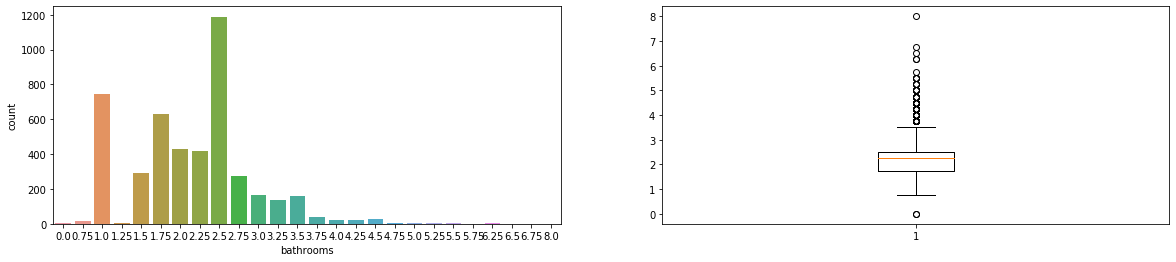

In [6]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.countplot(df['bathrooms'])
f.add_subplot(1,2,2)
plt.boxplot(df['bathrooms'])
plt.show()

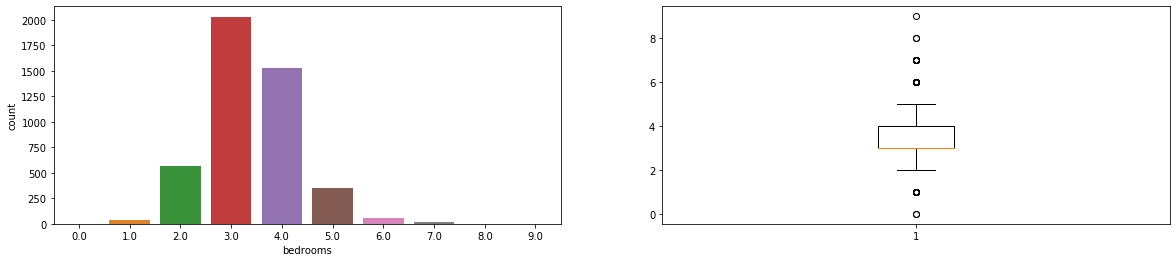

In [7]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.countplot(df['bedrooms'])
f.add_subplot(1,2,2)
plt.boxplot(df['bedrooms'])
plt.show()

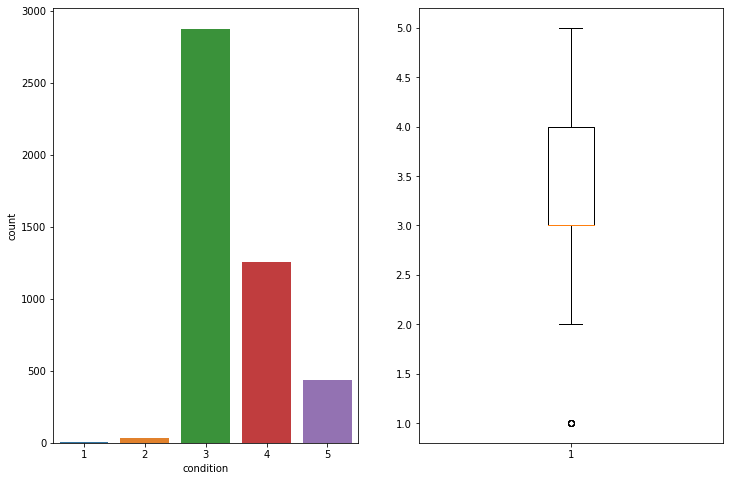

In [8]:
f = plt.figure(figsize=(12,8))
f.add_subplot(1,2,1)
sns.countplot(df['condition'])
f.add_subplot(1,2,2)
plt.boxplot(df['condition'])
plt.show()

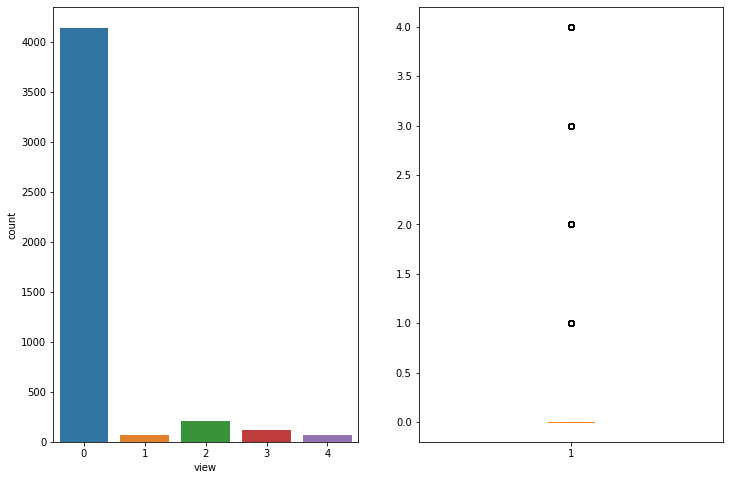

In [9]:
f = plt.figure(figsize=(12,8))
f.add_subplot(1,2,1)
sns.countplot(df['view'])
f.add_subplot(1,2,2)
plt.boxplot(df['view'])
plt.show()

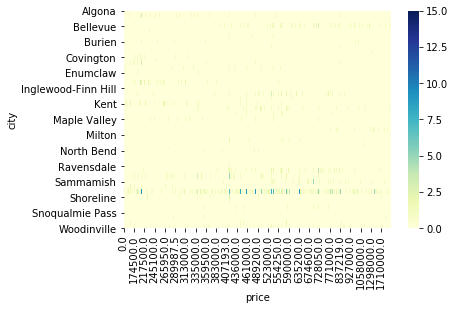

In [10]:
sns.heatmap(pd.crosstab(df['city'], df['price']),  cmap="YlGnBu", cbar=True)

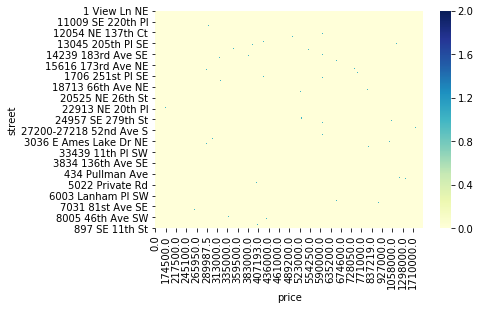

In [11]:
sns.heatmap(pd.crosstab(df['street'], df['price']),  cmap="YlGnBu", cbar=True)

In [12]:
df['price'].value_counts()

0.0         49
300000.0    42
400000.0    31
450000.0    29
600000.0    29
            ..
586500.0     1
693000.0     1
226500.0     1
257200.0     1
256000.0     1
Name: price, Length: 1741, dtype: int64

In [13]:
df['street'].value_counts()

2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
5968 44th Ave S           2
34115 SE Ash St           2
34214 SE Carmichael St    2
                         ..
12621 SE 187th Pl         1
11739 4th Ave NW          1
1315 232nd Pl NE          1
1223 7th Ave W            1
23319 NE 15th St          1
Name: street, Length: 4525, dtype: int64

In [14]:
len(df)

4600

# Using Collaborative Filtering

In [15]:
house=df.drop_duplicates(['price', 'bedrooms','bathrooms','condition','view','city','yr_built','street'])
house=house.reset_index(drop=True)


In [16]:
house=house.iloc[0:4000,]
house.shape

(4000, 8)

In [17]:
house_pivot=house.pivot_table(index='city',columns='street',values='price',fill_value=0)
house_pivot.head()

street,1 View Ln NE,10 W Etruria St,100 20th Ave E,100 24th Ave E,100 Mt Si Pl NW,1000 Mountain View Blvd SE,10005 16th Ave S,10009 SE 247th Pl,1001 SW 102nd St,1001 Whitman Ct NE,...,Indian Trail,Nuthatch Trail,SE 170th Pl,SE 21st Ct,Schmitz Park to Alki Trail,Shangri-La Way NW,Sunrise Loop Trail,Tolt Pipeline Trail,Trossachs Blvd SE,Valley View Trail
city,,,,,,,,,,,,,,,,,,,,,
Algona,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Auburn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Beaux Arts Village,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bellevue,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Black Diamond,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Train a Knn model using pivot_table

In [87]:
from sklearn.neighbors import NearestNeighbors
knn=NearestNeighbors(n_neighbors=10,metric='cosine')
Model=knn.fit(house_pivot)

In [88]:
house_pivot[house_pivot.index == 'Algona' ]

street,1 View Ln NE,10 W Etruria St,100 20th Ave E,100 24th Ave E,100 Mt Si Pl NW,1000 Mountain View Blvd SE,10005 16th Ave S,10009 SE 247th Pl,1001 SW 102nd St,1001 Whitman Ct NE,...,Indian Trail,Nuthatch Trail,SE 170th Pl,SE 21st Ct,Schmitz Park to Alki Trail,Shangri-La Way NW,Sunrise Loop Trail,Tolt Pipeline Trail,Trossachs Blvd SE,Valley View Trail
city,,,,,,,,,,,,,,,,,,,,,
Algona,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
data = house_pivot.iloc[1,]

In [90]:

distances, indices = Model.kneighbors([data])
distances, indices


(array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]),
 array([[ 1, 28, 26, 30, 29, 32, 25, 27, 24, 31]], dtype=int64))

In [91]:
neighbors=[]
for item in indices[0][1:]:
    neighbors.append(house[house.index == item].street.values[0])
neighbors

['23525 SE 32nd Way',
 '8436-8438 41st Ave SW',
 '14104 119th Ave NE',
 '3314 NW 75th St',
 '7201-7399 55th Ave NE',
 '27736 23rd Avenue South',
 '1036 4th St',
 '2021 NE 100th St',
 '20120 137th Ave NE']

In [92]:
neighbor_house=pd.DataFrame(columns=['price', 'bedrooms','bathrooms','condition','view','city','yr_built','street'])
for item in neighbors:
    neighbor_house=neighbor_house.append(house)
neighbor_house

C:\Users\ACER\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,bathrooms,bedrooms,city,condition,price,street,view,yr_built
0,1.50,3.0,Shoreline,3,313000.0,18810 Densmore Ave N,0,1955
1,2.50,5.0,Seattle,5,2384000.0,709 W Blaine St,4,1921
2,2.00,3.0,Kent,4,342000.0,26206-26214 143rd Ave SE,0,1966
3,2.25,3.0,Bellevue,4,420000.0,857 170th Pl NE,0,1963
4,2.50,4.0,Redmond,4,550000.0,9105 170th Ave NE,0,1976
...,...,...,...,...,...,...,...,...
3995,1.50,3.0,Seattle,4,295000.0,9047 4th Ave S,0,1908
3996,1.00,3.0,Woodinville,4,320000.0,17722 199th Ave NE,0,1969
3997,2.00,4.0,Seattle,3,780000.0,1937 10th Ave W,2,1953
3998,2.00,3.0,Seattle,5,437500.0,309 NW 89th St,0,1948


In [93]:
neighbor_house=pd.DataFrame({'Count':neighbor_house['street'],'House':neighbor_house.index.tolist()})
neighbor_house

,Count,House
0,18810 Densmore Ave N,0
1,709 W Blaine St,1
2,26206-26214 143rd Ave SE,2
3,857 170th Pl NE,3
4,9105 170th Ave NE,4
...,...,...
3995,9047 4th Ave S,3995
3996,17722 199th Ave NE,3996
3997,1937 10th Ave W,3997
3998,309 NW 89th St,3998


In [94]:
neighbor_house=neighbor_house.sort_values('Count',ascending=False)
neighbor_house

,Count,House
1654,Valley View Trail,1654
1654,Valley View Trail,1654
1654,Valley View Trail,1654
1654,Valley View Trail,1654
1654,Valley View Trail,1654
...,...,...
3395,1 View Ln NE,3395
3395,1 View Ln NE,3395
3395,1 View Ln NE,3395
3395,1 View Ln NE,3395


In [95]:


neighbor_house=neighbor_house.reset_index(drop=True)
neighbor_house



,Count,House
0,Valley View Trail,1654
1,Valley View Trail,1654
2,Valley View Trail,1654
3,Valley View Trail,1654
4,Valley View Trail,1654
...,...,...
35995,1 View Ln NE,3395
35996,1 View Ln NE,3395
35997,1 View Ln NE,3395
35998,1 View Ln NE,3395


In [96]:
Recommended_house=neighbor_house['Count'][0:10]
Recommended_house

0    Valley View Trail
1    Valley View Trail
2    Valley View Trail
3    Valley View Trail
4    Valley View Trail
5    Valley View Trail
6    Valley View Trail
7    Valley View Trail
8    Valley View Trail
9    Trossachs Blvd SE
Name: Count, dtype: object

In [29]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import KNNBasic,  KNNWithMeans, KNNBaseline
from surprise.model_selection import KFold
from surprise import Reader
from surprise import NormalPredictor
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
import seaborn as sns
from surprise.model_selection import GridSearchCV

In [41]:
reader = Reader(rating_scale=(1, 5))
# The columns must correspond to user id, item id and ratings (in that order).
datas = Dataset.load_from_df(df[['street', 'city', 'price']], reader)
anti_set = data.build_full_trainset().build_anti_testset()

In [42]:
anti_set

[('18810 Densmore Ave N', 'Seattle', 551962.9884732142),
 ('18810 Densmore Ave N', 'Kent', 551962.9884732142),
 ('18810 Densmore Ave N', 'Bellevue', 551962.9884732142),
 ('18810 Densmore Ave N', 'Redmond', 551962.9884732142),
 ('18810 Densmore Ave N', 'Maple Valley', 551962.9884732142),
 ('18810 Densmore Ave N', 'North Bend', 551962.9884732142),
 ('18810 Densmore Ave N', 'Lake Forest Park', 551962.9884732142),
 ('18810 Densmore Ave N', 'Sammamish', 551962.9884732142),
 ('18810 Densmore Ave N', 'Auburn', 551962.9884732142),
 ('18810 Densmore Ave N', 'Des Moines', 551962.9884732142),
 ('18810 Densmore Ave N', 'Bothell', 551962.9884732142),
 ('18810 Densmore Ave N', 'Federal Way', 551962.9884732142),
 ('18810 Densmore Ave N', 'Kirkland', 551962.9884732142),
 ('18810 Densmore Ave N', 'Issaquah', 551962.9884732142),
 ('18810 Densmore Ave N', 'Woodinville', 551962.9884732142),
 ('18810 Densmore Ave N', 'Normandy Park', 551962.9884732142),
 ('18810 Densmore Ave N', 'Fall City', 551962.9884732

In [43]:
kf = KFold(n_splits=3)
algo = KNNBasic()
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(datas):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_algo = algo
        best_pred = predictions

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 730324.6130
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 677140.4810
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 935766.5905


In [39]:
print(predictions)

[Prediction(uid='27815 256th Ct SE', iid='Maple Valley', r_ui=371000.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}), Prediction(uid='22500-22614 16th Ave S', iid='Des Moines', r_ui=386000.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}), Prediction(uid='1106 N 80th St', iid='Seattle', r_ui=452000.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}), Prediction(uid='1523 30th Ave S', iid='Seattle', r_ui=353250.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}), Prediction(uid='419 Wetherbee Ln', iid='Enumclaw', r_ui=297000.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}), Prediction(uid='6849 26th Ave NE', iid='Seattle', r_ui=350000.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}), Prediction(uid='12001 173rd Pl NE', iid='Redmond', r_ui=830000.0, est=5, details={'was_impos

In [47]:
kf = KFold(n_splits=5)
sim_options = {'name':'cosine'}
algo = KNNWithMeans(sim_options = sim_options)
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(datas):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_algo = algo
        best_rmse= rmse
        best_pred = predictions
print(best_rmse)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 679089.8526
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 625055.5740
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1084464.8827
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 821620.1192
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 639929.0661
1000.0


In [46]:
predictions

[Prediction(uid='5121 NE 180th St', iid='Lake Forest Park', r_ui=755000.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='17052 34th Ave S', iid='SeaTac', r_ui=160000.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='10208 NE 26th St', iid='Bellevue', r_ui=1038000.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='35019 SE Terrace St', iid='Snoqualmie', r_ui=480000.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='106 24th Ave E', iid='Seattle', r_ui=479000.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='17825 4th Ave SW', iid='Normandy Park', r_ui=403000.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='16621 SE 235th St', iid='Kent', r_ui=375000.0, est=5, details={

In [48]:
kf = KFold(n_splits=3)
algo = KNNBaseline(k=3)
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(datas):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_rmse = rmse
        best_algo = algo
        best_pred = predictions

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 667254.0662
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 996378.0430
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 655448.4639


In [49]:
predictions

[Prediction(uid='11520 36th Ave NE', iid='Seattle', r_ui=267000.0, est=5, details={'was_impossible': False}),
 Prediction(uid='11009 SE 220th Pl', iid='Kent', r_ui=265000.0, est=5, details={'was_impossible': False}),
 Prediction(uid='22840 SE 269th St', iid='Maple Valley', r_ui=297500.0, est=5, details={'was_impossible': False}),
 Prediction(uid='1212 NE 162nd St', iid='Shoreline', r_ui=299995.0, est=5, details={'was_impossible': False}),
 Prediction(uid='1915 Ginko St SE', iid='Auburn', r_ui=328211.90476199996, est=5, details={'was_impossible': False}),
 Prediction(uid='14712 SE 105th Pl', iid='Renton', r_ui=320000.0, est=5, details={'was_impossible': False}),
 Prediction(uid='3423 33rd Ave W', iid='Seattle', r_ui=442900.0, est=5, details={'was_impossible': False}),
 Prediction(uid='19523 53rd Ave NE', iid='Lake Forest Park', r_ui=475000.0, est=5, details={'was_impossible': False}),
 Prediction(uid='1709 NE 86th St', iid='Seattle', r_ui=379000.0, est=5, details={'was_impossible': Fals

In [50]:
sim_options = { 'name': 'cosine' ,'user_based':  False}
kf = KFold(n_splits=5)
algo = KNNWithMeans(k =3 , sim_options = sim_options)
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(datas):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_rmse= rmse
        best_algo = algo
        best_pred = predictions

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 653941.9139
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 648074.5229
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 693679.3956
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1097811.1852
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 760571.6889


In [51]:
predictions

[Prediction(uid='2619 NW 60th St', iid='Seattle', r_ui=525000.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='18507 71st Ave NE', iid='Kenmore', r_ui=380000.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='6326 21st Ave NE', iid='Seattle', r_ui=656500.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='14423 25th Ave SW', iid='Burien', r_ui=995000.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='3311 NW 75th St', iid='Seattle', r_ui=815000.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='12721 83rd Ct NE', iid='Kirkland', r_ui=410000.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='5659 178th Ave SE', iid='Bellevue', r_ui=995000.0, est=5, details={'was_impossible'

In [97]:
pred_df = pd.DataFrame(predictions).merge(df , left_on = ['uid', 'iid'], right_on = ['street', 'city'])
pred_df[['uid', 'iid','est','price']]

,uid,iid,est,price
0,2619 NW 60th St,Seattle,5,525000.0
1,18507 71st Ave NE,Kenmore,5,380000.0
2,6326 21st Ave NE,Seattle,5,656500.0
3,14423 25th Ave SW,Burien,5,995000.0
4,3311 NW 75th St,Seattle,5,815000.0
...,...,...,...,...
937,18504 NE 21st St,Redmond,5,592500.0
938,2356 Rosemont Pl W,Seattle,5,193000.0
939,14216-14228 117th Ave NE,Kirkland,5,465000.0
940,2033 211th Pl SE,Sammamish,5,966000.0


In [98]:
anti_pre = algo.test(anti_set)
pred_df = pd.DataFrame(anti_pre).merge(house , left_on = ['iid'], right_on = ['city'])
pred_df = pd.DataFrame(pred_df).merge(house , left_on = ['uid'], right_on = ['street'])

In [99]:
print(pred_df)

                           uid        iid           r_ui  est  \
0         18810 Densmore Ave N    Seattle  551962.988473    5   
1         18810 Densmore Ave N    Seattle  551962.988473    5   
2         18810 Densmore Ave N    Seattle  551962.988473    5   
3         18810 Densmore Ave N    Seattle  551962.988473    5   
4         18810 Densmore Ave N    Seattle  551962.988473    5   
...                        ...        ...            ...  ...   
13710211        814 20th Ave S  Shoreline  551962.988473    5   
13710212        814 20th Ave S  Shoreline  551962.988473    5   
13710213        814 20th Ave S  Shoreline  551962.988473    5   
13710214        814 20th Ave S  Shoreline  551962.988473    5   
13710215        814 20th Ave S  Shoreline  551962.988473    5   

                                           details    price_x  bedrooms_x  \
0         {'actual_k': 0, 'was_impossible': False}  2384000.0         5.0   
1         {'actual_k': 0, 'was_impossible': False}   490000.0    

In [70]:
pred = pred_df[(pred_df['est']>=5.0)&(pred_df['price_x']>=300000.0)]
pred.head()

,uid,iid,r_ui,est,details,price_x,bedrooms_x,bathrooms_x,view_x,condition_x,...,street_x,city_x,price_y,bedrooms_y,bathrooms_y,view_y,condition_y,yr_built_y,street_y,city_y
0,18810 Densmore Ave N,Seattle,551962.988473,5,"{'actual_k': 0, 'was_impossible': False}",2384000.0,5.0,2.5,4,5,...,709 W Blaine St,Seattle,313000.0,3.0,1.5,0,3,1955,18810 Densmore Ave N,Shoreline
1,18810 Densmore Ave N,Seattle,551962.988473,5,"{'actual_k': 0, 'was_impossible': False}",490000.0,2.0,1.0,0,3,...,522 NE 88th St,Seattle,313000.0,3.0,1.5,0,3,1955,18810 Densmore Ave N,Shoreline
2,18810 Densmore Ave N,Seattle,551962.988473,5,"{'actual_k': 0, 'was_impossible': False}",640000.0,4.0,2.0,0,3,...,6811 55th Ave NE,Seattle,313000.0,3.0,1.5,0,3,1955,18810 Densmore Ave N,Shoreline
3,18810 Densmore Ave N,Seattle,551962.988473,5,"{'actual_k': 0, 'was_impossible': False}",1400000.0,4.0,2.5,0,5,...,3838-4098 44th Ave NE,Seattle,313000.0,3.0,1.5,0,3,1955,18810 Densmore Ave N,Shoreline
4,18810 Densmore Ave N,Seattle,551962.988473,5,"{'actual_k': 0, 'was_impossible': False}",365000.0,3.0,1.0,0,4,...,2504 SW Portland Ct,Seattle,313000.0,3.0,1.5,0,3,1955,18810 Densmore Ave N,Shoreline


In [100]:
tsr_inner_id = algo.trainset.to_inner_iid('Seattle')
tsr_neighbors = algo.get_neighbors(tsr_inner_id, k=4)
house[house.city.isin([algo.trainset.to_raw_iid(inner_id)
                       for inner_id in tsr_neighbors])].head()

,price,bedrooms,bathrooms,view,condition,yr_built,street,city
12,588500.0,3.0,1.75,0,3,1980,1833 220th Pl NE,Sammamish
28,675000.0,5.0,2.50,0,3,1979,23525 SE 32nd Way,Issaquah
31,499950.0,4.0,2.50,0,3,2004,20120 137th Ave NE,Woodinville
41,260000.0,4.0,2.00,0,4,1974,2019 Aberdeen Pl SE,Renton
45,315000.0,3.0,1.00,0,3,1968,15804 198th Pl NE,Woodinville
